In [43]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt

In [44]:
"""
Arguments:
    k      - number of arms
    minq   - minimum value of q_star for each arm
    maxq   - maximum value of q_star for each arm
    stddev - standard deviation that randomize the values while action is executed
"""

class Bandit:
    def __init__(self, q_star, stddev=2):
        self.stddev = stddev
        self.q_star = q_star

    def execute(self, arm):
        return self.q_star[arm] + np.random.normal(scale=self.stddev)

In [45]:
bandit = Bandit([4, 5, 3, 3, 1, 2, 0, 1, 5, 1])
print(bandit.q_star)
bandit.execute(3)

[4, 5, 3, 3, 1, 2, 0, 1, 5, 1]


4.203920606021738

In [46]:
class RandomAgent:
    def __init__(self, bandit):
        """
        Arguments:
            bandit - bandit that the agent will operate on (used only to set initial values of q_est and n)
        """
        self.q_est =  [0] * len(bandit.q_star)
        self.n =  [0] * len(bandit.q_star)
                
    def act(self, bandit):
        """
        Performs an action (selects an arm randomly) and updates corespondingn q_est and n values
        Arguments:
            bandit - bandit that the agent is operated on
        Returns:
            reward - reward from the bandit (a result of the performed action)
        """
        arm = np.random.randint(len(self.q_est))
        reward = bandit.execute(arm)
        self.n[arm] += 1
        
        # Q_n+1 = Qn + (1 / n) * (R - Q_n)
        self.q_est[arm] += (reward - self.q_est[arm]) / self.n[arm]
        
        return reward

In [47]:
agent = RandomAgent(bandit)
rewards = []
for step in range (1000):
    reward = agent.act(bandit)
    rewards.append(reward)

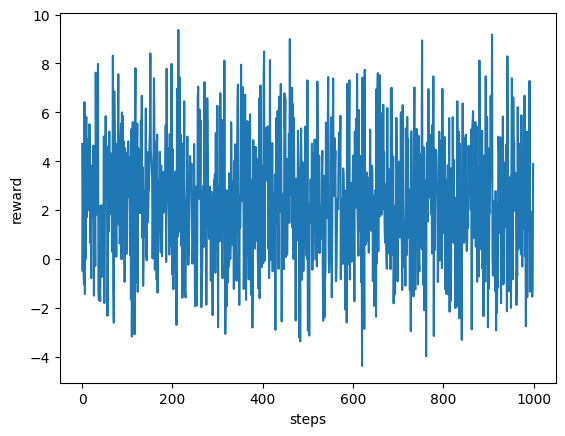

In [48]:
def plot_rewards (rewards):
    """
    Plots the rewards
    """
    f = plt.figure()
    plt.plot(rewards)
    plt.xlabel('steps')
    plt.ylabel('reward')
    plt.show()
    
plot_rewards(rewards)

In [49]:
def display_agent(agent, bandit):
    """
    Displays the agent data, namely:
    q_star - real expected rewards from the bandit
    q_est  - expected rewards extimated by the agent
    n      - how many times the agent selected this particular arm
    """
    df = pd.DataFrame()
    df['q_star'] = bandit.q_star
    df['q_est'] = agent.q_est
    df['n'] = agent.n
    return df

display_agent(agent, bandit)

,q_star,q_est,n
0,4,3.895141,105
1,5,5.063061,85
2,3,3.117829,107
3,3,3.036923,84
4,1,0.843356,115
5,2,1.608447,113
6,0,-0.058963,87
7,1,0.684479,113
8,5,5.126668,97
9,1,0.914201,94


In [50]:
class EpsilonGreedyAgent:
    def __init__(self, bandit, epsilon = 0.1):
        """
        Arguments:
            bandit - bandit that the agent will operate on (used only to set initial values of q_est and n)
            epsilon - exploration parameter 
        """        
        self.q_est = [0] * len(bandit.q_star)
        self.n =  [0] * len(bandit.q_star)
        self.epsilon = epsilon
        
    def act(self, bandit):
        """
        Performs an action (uses epsilon-greedy approach to select an arm)
        and pdates corespondingn q_est and n values
        Arguments:
            bandit - bandit that the agent is operated on
        Returns:
            reward - reward from the bandit (a result of the performed action)
        """        
        if np.random.random() > self.epsilon:
            arm = np.argmax(self.q_est)
        else:
            arm = np.random.randint(len(self.q_est))
        reward = bandit.execute(arm)
        self.n[arm] += 1
        
        # Q_n+1 = Qn + (1 / n) * (R - Q_n)
        self.q_est[arm] += (reward - self.q_est[arm]) / self.n[arm]
        
        return reward

In [51]:
total_rewards = []
for loop in tqdm(range (2000)):
    agent = EpsilonGreedyAgent(bandit)
    rewards = []
    for step in range (1000):
        reward = agent.act(bandit)
        rewards.append(reward)
    
    total_rewards.append(rewards)
total_rewards = np.asarray(total_rewards)
rewards = total_rewards.mean(axis=0)
print (rewards.shape)

100%|██████████| 2000/2000 [00:28<00:00, 69.34it/s]


(1000,)


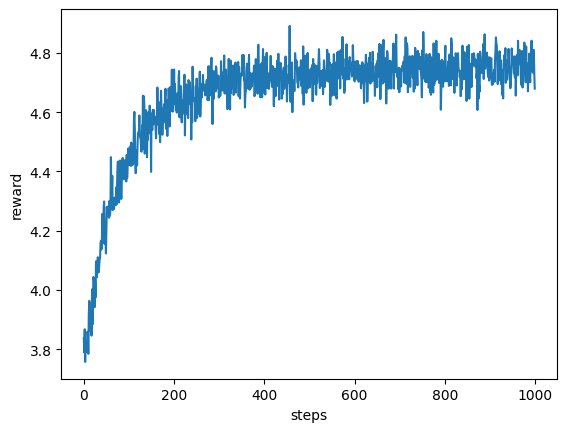

,q_star,q_est,n
0,4,4.190649,555
1,5,4.410060,7
2,3,2.156063,7
3,3,3.661975,9
4,1,1.058872,14
5,2,2.619023,12
6,0,-0.085175,13
7,1,0.837018,13
8,5,5.162192,360
9,1,2.023772,10


In [52]:
plot_rewards(rewards)
display_agent(agent, bandit)

In [53]:
df_rewards = pd.DataFrame()
df_rewards['eGreedy'] = rewards

In [54]:
"""
Task 1 - Optimistic agent
Please fill in the placeholders to implement the optimistic agent. Generally, you are suppose to prepate the __init__ and act methods.

In the __init__ method you should set the initial values optimistically.

In the act method you should:
- Perform an action (select the arm greedily based on the estimated values)
- Update the corresponding estimated value    
"""
class OptimisticAgent:
    def __init__(self, bandit, initial_value = 10):
        """
        Arguments:
            bandit - bandit that the agent will operate on (used only to set initial values of q_est and n)
            initial_value - initial value for estimated q_star. It should be high enough to make the algorithm work
        """
        
        self.q_est =  None #Enter your code here
        self.n =  [0] * len(bandit.q_star)
        self.initial_value = initial_value
                
    def act(self, bandit):
        """
        Performs an action (selects an arm greedily based on the estimated q_star values ) 
        and updates corespondingn q_est and n values
        Arguments:
            bandit - bandit that the agent is operated on
        Returns:
            reward - reward from the bandit (a result of the performed action)
        """
        
        arm = None # Enter your code here
        reward = None # Enter your code here
        self.n[arm] += 1
        
        # Q_n+1 = Qn + (1 / n) * (R - Q_n)
        self.q_est[arm] = None # Enter your code here
        self.bandit = bandit
        
        return reward